In [25]:
import numpy as np
import matplotlib.pyplot as plt
import composite
%matplotlib inline

In [75]:
def gsmooth(x_array, y_array, var_y, vexp = .001, nsig = 5.0):
    #returns smoothed flux array
    # if no variance array create a constant one
    if len(var_y) == 0:
        var_y = np.zeros(len(y_array))
        
    for i in range(len(var_y)):
        if var_y[i] == 0:
            var_y[i] = 1E-20
            # var_y[i] = 1E-31
    
    # Output y-array
    new_y = np.zeros(len(x_array), float)
    
    # Loop over y-array elements
    for i in range(len(x_array)):
        
        # Construct a Gaussian of sigma = vexp*x_array[i]
        gaussian = np.zeros(len(x_array), float)
        sigma = vexp*x_array[i]
        
        # Restrict range to +/- nsig sigma
        sigrange = np.nonzero(abs(x_array-x_array[i]) <= nsig*sigma)
        gaussian[sigrange] = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x_array[sigrange]-x_array[i])/sigma)**2)
        
        # Multiply Gaussian by 1 / variance
        W_lambda = gaussian / var_y
        
        # Perform a weighted sum to give smoothed y value at x_array[i]
        W0 = np.sum(W_lambda)
        W1 = np.sum(W_lambda*y_array)
        new_y[i] = W1/W0

    # Return smoothed y-array
    return new_y

In [22]:
carbon_query = "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where (Carbon = 'A' or Carbon = 'F' or Carbon = 'N') and phase"

In [27]:
SN_Array = composite.grab(carbon_query, multi_epoch = True, make_corr = True)

ERROR:  1998bu_19990126_0_2_00.dat None
ERROR:  2002bo_20020314_0_2_00.dat None
ERROR:  2002bo_20020403_0_2_00.dat None
ERROR:  2002bo_20020421_0_2_00.dat None
ERROR:  2002bo_20020518_0_2_00.dat None
ERROR:  2002bo_20020615_9394_16509_00.dat None
ERROR:  sn2007jg-20070918-not.dat None
ERROR:  sn1992a-19920116.220-iue.flm None
159 questionable files currently ignored
94 questionable spectra removed 2465 spectra left
81 Peculiar Ias removed 2384 spectra left
2109 spectra with host corrections
2109 valid SNe found
Arrays cleaned


In [71]:
names = []
for i, SN in enumerate(SN_Array):
    print i, SN.name, SN.filename, SN.source, SN.phase, SN.carbon
    names.append(SN.name)

0 1989b sn1989b-19890221.flm bsnip 13.455370726 F
1 1989b sn1989b-19890427-o1i1.flm bsnip 78.2981270419 F
2 1989b sn1989b-19890710-o.flm bsnip 152.119111155 F
3 1990n sn1990n-19900717-oi.flm bsnip 7.33808719397 A
4 1990n sn1990n-19900731-oi.flm bsnip 21.4830649943 A
5 1990n sn1990n-19900829-oi.flm bsnip 50.3450784586 A
6 1990n sn1990n-19900830-ir2.flm bsnip 51.1892126231 A
7 1990n sn1990n-19901217-opt2.flm bsnip 160.395457422 A
8 1991bg sn1991bg-19911213-noz.flm bsnip 0.681687715271 N
9 1991bg sn1991bg-19911214-noz.flm bsnip 1.67830718204 N
10 1991bg sn1991bg-19920101-noz.flm bsnip 19.6174575839 N
11 1991bg sn1991bg-19920109-hires-noz.flm bsnip 27.590413318 N
12 1991bg sn1991bg-19920109-noz.flm bsnip 27.590413318 N
13 1991bg sn1991bg-19920130-noz.flm bsnip 48.5194221202 N
14 1991bg sn1991bg-19920313-noz.flm bsnip 91.8653925883 N
15 1991bg sn1991bg-19920523-uoi.flm bsnip 162.441996747 N
16 1991t sn1991t-19910419.flm bsnip -8.66879898507 F
17 1991t sn1991t-19910505.flm bsnip 7.2390784964

In [74]:
events = set(names)
print len(names), 'spectra of', len(events), 'SNe'

2109 spectra of 140 SNe


2003kf -9.47499870953 A


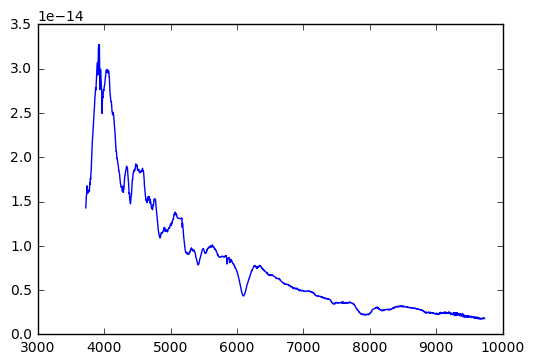

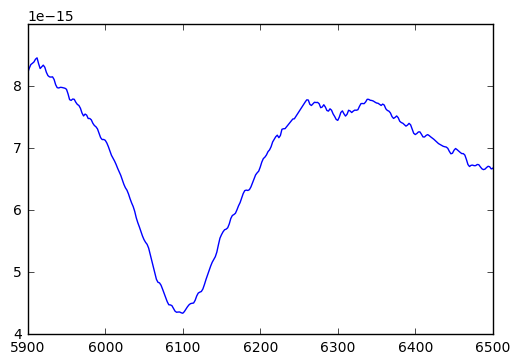

In [70]:
# example = SN_Array[520]
example = SN_Array[1067]
print example.name, example.phase, example.carbon
plt.plot(example.wavelength[example.x1:example.x2], example.flux[example.x1:example.x2])
plt.show()
plt.plot(example.wavelength[example.x1:example.x2], example.flux[example.x1:example.x2])
plt.xlim([5900.,6500.])
plt.ylim([0.4e-14,0.9e-14])
plt.show()